# **Breast Cancer Wisconsin Dataset**

Breast Cancer Wisconsin Dataset is a classic dataset that is often use to illustrate 
binary classification. This dataset contains 30 features the are computed from a digitized 
image of a finare computed for each cell nucleus:


1.   radius (mean oe needle aspirate (FNA) of a breast mass. The features describe the 
characteristics of the cell nuclei present in the image. Ten real-valued features f distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
2.   perimeter
2.   area
2.   smoothness (local variation in radius lengths)
2.   compactness (perimeter^2 / area - 1.0)
2.   concavity (severity of concave portions of the contour)
2.   concave points (number of concave portions of the contour)
1.   symmetry
2.   fractal dimension ("coastline approximation" - 1)

The Breast Cancer dataset can be imported from the datasets module from sklearn using 
the function `load_breast_cancer()`.

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the dataset
bc_dataset = load_breast_cancer()
data = np.c_[bc_dataset.data, bc_dataset.target]
columns = np.append(bc_dataset.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# na values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
# shape
df.shape

(569, 31)

In [6]:
# target value
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

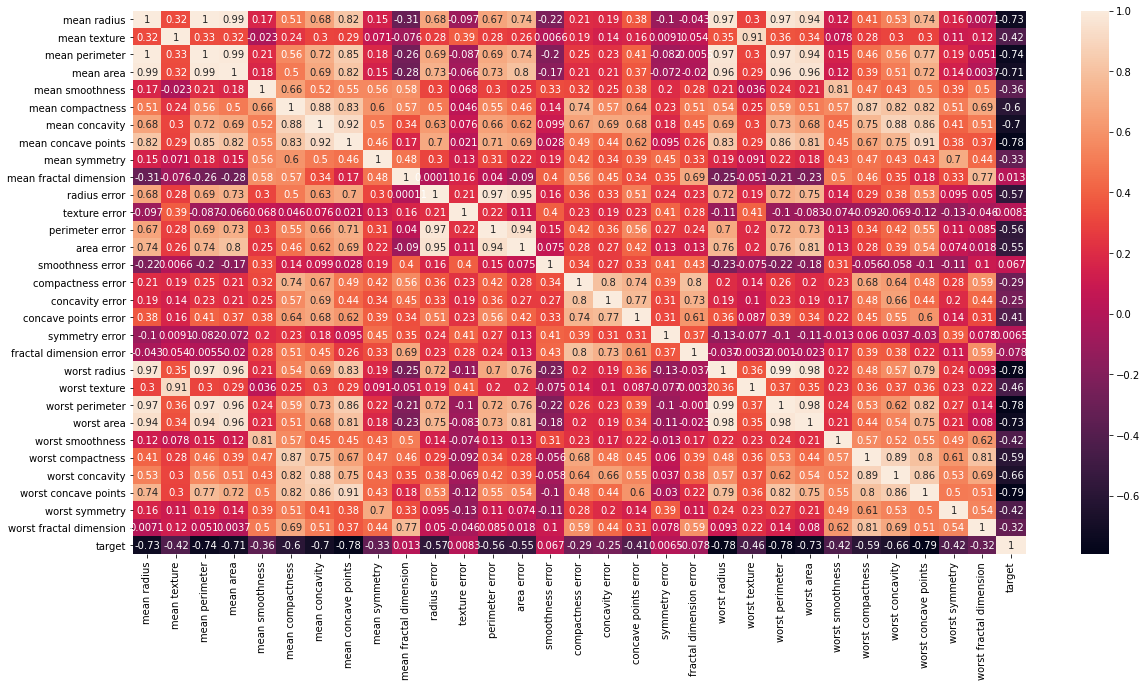

In [7]:
# Data Visualization and Bivariate Analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

redundant information (correlations above 0.9)

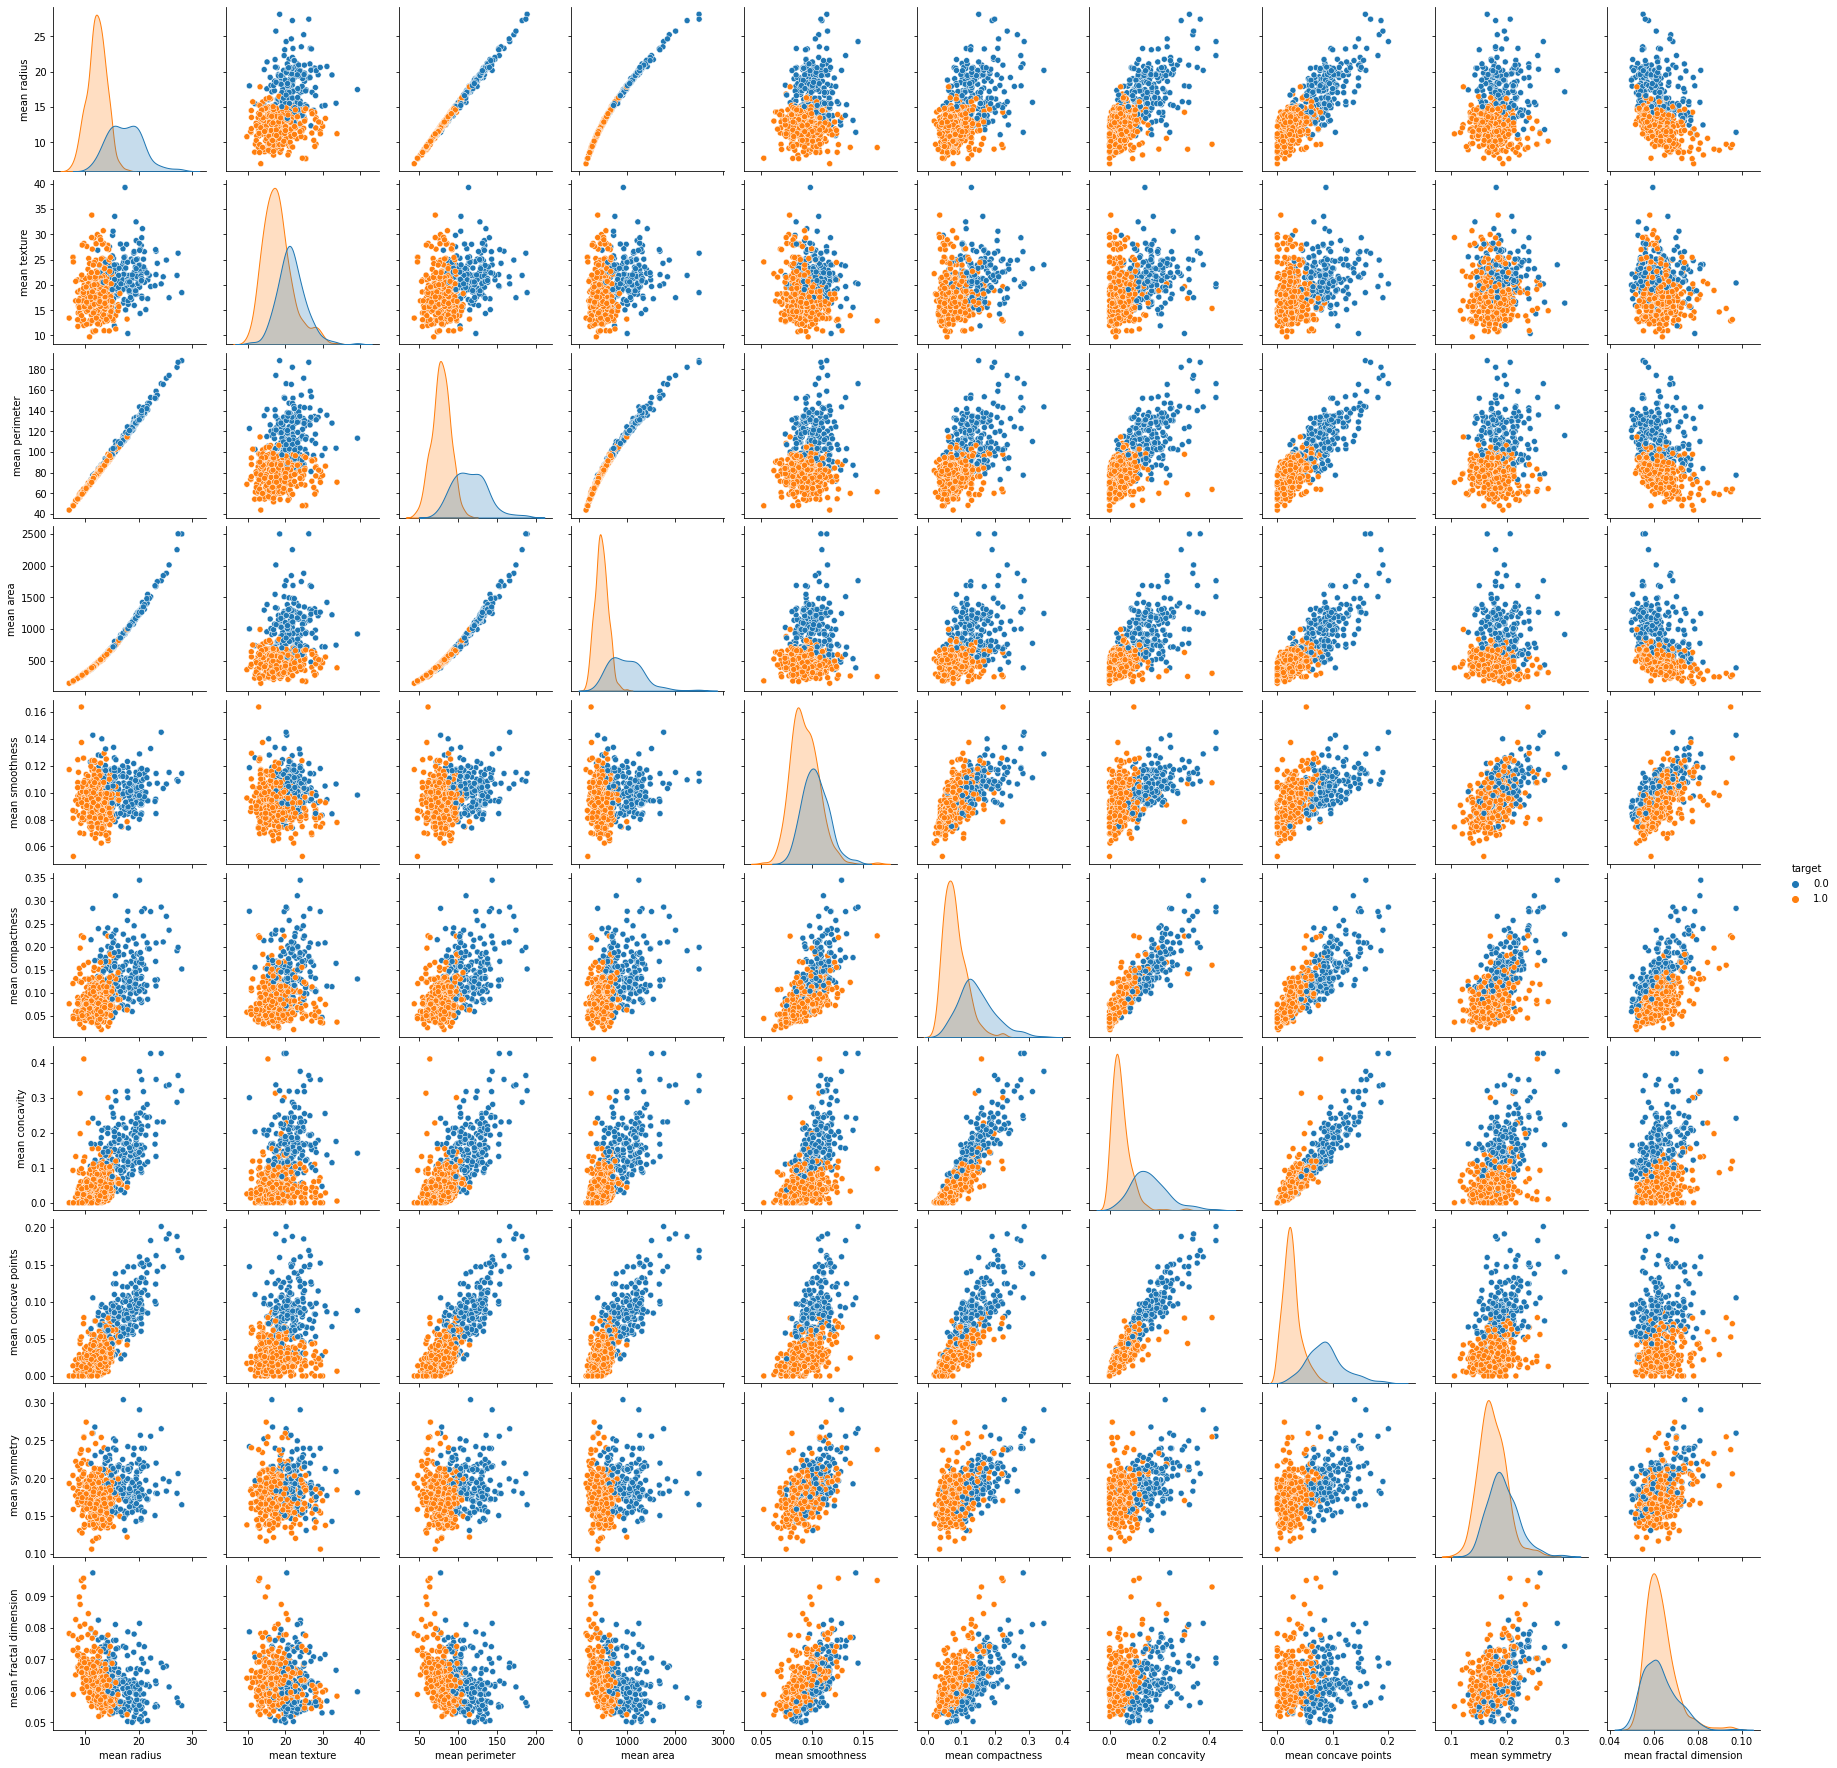

In [8]:
sns.pairplot(df, hue='target', 
             vars=['mean radius',                
                    'mean texture',             
                    'mean perimeter',             
                    'mean area',                  
                    'mean smoothness',            
                    'mean compactness',           
                    'mean concavity',             
                    'mean concave points',        
                    'mean symmetry',              
                    'mean fractal dimension'])

# **Activities**

## 1. **Logistic Regression.**

 Implement the Logistic Regression Model as a Python Class
(Check the structure in previous assignments).

In [9]:
def sigmoid(z):
    # Computes sigmoid function over the linear model
    return 1 / (1 + np.exp(-z))

def compute_weights(XTrain, weights):
    # Computes the weighted sum of inputs
    return np.dot(XTrain, weights)

def probability(XTrain, weights):
    # Returns the probability after passing through sigmoid
    return sigmoid(compute_weights(XTrain, weights))

def cost_function(weights, XTrain, YTrain):
  # Computes the cost function for all the training samples
  m = XTrain.shape[0]
  total_cost = -(1 / m) * np.sum(YTrain * np.log(probability(XTrain, weights)) + (1 - YTrain) * np.log(1 - probability(XTrain, weights)))
  return total_cost
  
def gradient(weights, XTrain, YTrain):
    # Computes the gradient of the cost function at the point theta
    m = XTrain.shape[0]
    return (1 / m) * np.dot(XTrain.T, sigmoid(compute_weights(XTrain, weights)) - YTrain)

class LogRegression:

  def __init__(self, prob_threshold=0.5):
        """
        <Initialize Logisticregression class with the following parameters and attributes>
        
        Input:
        <prob_threshold = 0.5>
        
        Output:
        <nothing>
        """

        self.prob_threshold = prob_threshold

  def predict(self, XTest):
        """
        <Compute the predicted labels for a given test data>

        Input:
        <inputs: input vector data array>
        
        Output:
        <activation: predicted labels array>
        """
        # Add column of ones (bias)
        XTest_ones = np.c_[np.ones((XTest.shape[0], 1)), XTest]

        # vector of weights
        theta = self.weights

        # Compute probabilities
        self.probability_list = probability(XTest_ones, theta)

        # Activation function
        predicted_classes = (self.probability_list >= self.prob_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        
        return predicted_classes
        

  def fit(self, XTrain, YTrain):
        from scipy.optimize import fmin_tnc

        """
        <Optimize the weights vector using the cost and gradient functions>
        """

        # Add a column of ones to XTrain (bias)
        XTrain_ones = np.c_[np.ones((XTrain.shape[0], 1)), XTrain]

        # Re arrange target vector to be a column vector
        YTrain_col = YTrain[:, np.newaxis]

        # Initialize vector of weights
        self.weights = np.zeros((XTrain_ones.shape[1], 1))

        # Optimization of cost function using gradient function
        opt_weights = fmin_tnc(func=cost_function, x0=self.weights, fprime=gradient, args=(XTrain_ones, YTrain_col.flatten()))
        
        self.weights = opt_weights[0]



## 2. **Features Plot.** 

Plot a scatter plot using mean texture and mean radius. Display 
malignant growths in red and benign growths in blue.

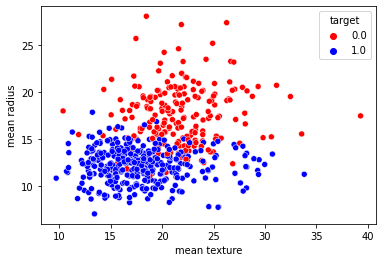

In [10]:
sns.scatterplot(x='mean texture',y='mean radius', hue='target', data = df, palette=['red','blue'])

## 3. **Logistic Regression Prediction using one feature.** 

Predict if a tumor is cancerous by 
only using the first feature of the dataset: mean radius

**(a)** Make a scatter plot of the 
class (malignant/benign) as a function of the mean radius

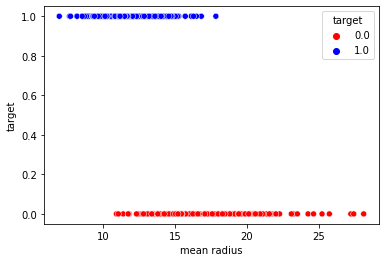

In [11]:
sns.scatterplot(x='mean radius',y='target', hue='target', data = df, palette=['red','blue'])

**(b)** Use the 
LogisticRegression class to train a Logistic Regression model 

In [12]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(df[['mean radius']], 
                                                                    df['target'].to_numpy(), 
                                                                    test_size=0.25, 
                                                                    stratify=df['target'],
                                                                    random_state=0)

In [13]:
# Train the model
model = LogRegression(prob_threshold=0.5)
model.fit(data_train,target_train)
model.predict(data_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

**(c)** Print the intercept 
(w0) and coefficient (w1) 

In [14]:
print('w0: ', model.weights[0])

w0:  15.561539996578766


In [15]:
print('w1: ', model.weights[1])

w1:  -1.0595519204551689


**(d)** Plot the fitted sigmoid curve and the original data

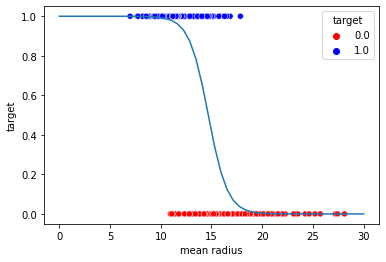

In [16]:
def sigmoid_prob(x):
  return ( 1 / ( 1 + np.exp(-(model.weights[0] + model.weights[1]*x))))

x = np.linspace(0,30).reshape((50,1))
y = sigmoid_prob(x)

plt.plot(x,y)
sns.scatterplot(x='mean radius',y='target', hue='target', data = df, palette=['red','blue'])

plt.show()

**(d)** Predict the result if the mean radius is 8 and 20. Print the probabilitat the the 
prediction is malignant, benign and preditec class *(predict_proba() and predict())*.

In [17]:
test = np.array([[8],
        [20]])

pred = model.predict(test)

prob = model.probability_list

In [18]:
print('{} was predicted as {} (bening) and had a probability of being bening of {}'.format(test[0],pred[0],prob[0]))
print('{} was predicted as {} (malignant) and had a probability of being bening of {}'.format(test[1],pred[1],prob[1]))

[8] was predicted as 1 (bening) and had a probability of being bening of 0.9991632303654195
[20] was predicted as 0 (malignant) and had a probability of being bening of 0.0035775310823804086


**Using sklearn for the same train and test data to get intercept and coefs:**

In [19]:
log_reg = LogisticRegression()
log_reg.fit(data_train, target_train)

print(log_reg.intercept_)
print(log_reg.coef_)

[15.5106594]
[[-1.05583514]]


**Yay :D almost the same results !**

## 4. **Logistic Regression Prediction using all features.** 

Train the model using the features 
you consider important

The **general assumption** of the Bivariate Analysis is that features that are highly associated provide redundant information: for this reason, we want to eliminate them, avoiding a predictive bias.

**Step 1**. Remove all features with a correlation higher than 0.9

In [20]:
# Drop target column
df_features = df.drop(df.columns[-1],axis=1)

# Correlation matrix 
corr_matrix = df_features.corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

**Step 2.** Re-plot the df with the remaining features

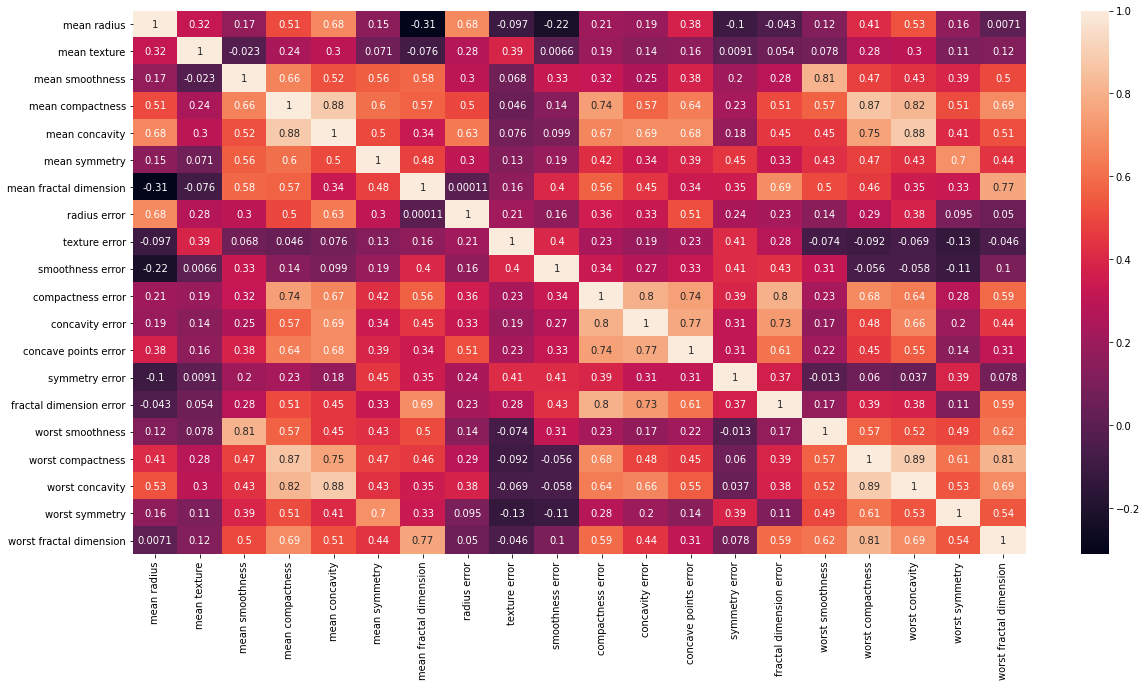

In [21]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
plt.figure(figsize=(20,10))
sns.heatmap(df_features_corr_dropped.corr(), annot=True)
plt.show()

**Now we are ready to use only significant features! uwu**

**(a)** Split the dataset into 75% training and 25% testing set. 
Don’t forget to use the `stratify` parameter in the `train_test_split` function to specify
which column to use so that the split is proportionate

In [22]:
data_train, data_test, target_train, target_test = train_test_split(df_features_corr_dropped, 
                                                                    df['target'].to_numpy(), 
                                                                    test_size=0.25, 
                                                                    stratify=df['target'],
                                                                    random_state=0)

In [23]:
# Train the model
model = LogRegression(prob_threshold=0.5)
model.fit(data_train,target_train)
model.predict(data_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

**(b)** Print the intercept and 
coefficients of the features.

In [24]:
print('intercept: ', model.weights[0])

intercept:  72.36637854511571


In [25]:
print('coefficients: ', model.weights[1:])

coefficients:  [  -1.96089245   -0.52724368  -38.39267041   48.28478118  -64.68651977
   28.27476886   55.69918517  -28.40912804   -0.73850465   -6.50550489
  188.47833328   57.04212288 -241.77145419  128.96803868  100.0156238
  -52.67231944  -10.24955083  -12.44561247  -33.57140392 -131.63741239]


## 5. **Testing the Model.**

**(a)** Predict the observations in 
the test set. Print the results of the predictions 
and original diagnosis side-by-side for an easy 
comparison

In [26]:
# pendiente
results = pd.DataFrame()
results['Probability'] = model.probability_list
results['Target'] = target_test
results['Predicted'] = model.predict(data_test)
results.head()

,Probability,Target,Predicted
0,9.999638e-01,1.0,1
1,1.911076e-10,0.0,0
2,1.404502e-08,0.0,0
3,1.000000e+00,1.0,1
4,5.581233e-06,0.0,0


In [27]:
print('Accuracy: ', np.mean(model.predict(data_test) == target_test)*100)

Accuracy:  95.8041958041958


**(b)** The confusion matrix shows the 
number of actual and predicted labels and how 
many of them are classified correctly. Print the 
Confusion Matrix. You can use crosstab() or confusion_matrix()
function to print it.

In [28]:
from sklearn.metrics import confusion_matrix
cf_matrix  = confusion_matrix(target_test, model.predict(data_test)) 
cf_matrix 

array([[51,  2],
       [ 4, 86]])

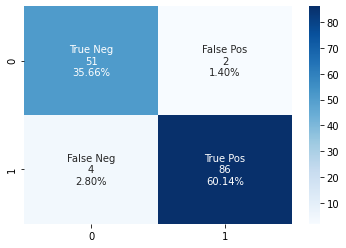

In [29]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

**c)** Based on the confusion matrix, calculate the 
following metrics:



1.   Accuracy
2.   Recall
2.   False Positive Rate (FPR)
2.   F1 Score



In [30]:
def scores(target_test, pred_test):
  tn, fp, fn, tp = confusion_matrix(target_test, pred_test).ravel()

  acc = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (fp + tp)
  recall = tp / (tp + fn)
  fpr = fp / ( fp + tn)
  f1 = 2 * ((precision*recall)/(precision+recall))

  return acc.round(2), recall.round(2), fpr.round(2), f1.round(2)

In [31]:
acc, recall, fpr, f1 = scores(target_test, model.predict(data_test))

print('ACC: ', acc)
print('RECALL:', recall)
print('FPR: ', fpr)
print('F1: ', f1)

ACC:  0.96
RECALL: 0.96
FPR:  0.04
F1:  0.97


**(d)** If a malignant tumor is represented as negative and benign tumor is represented 
as positive, what does it mean if:

*   **The precision or recall is high:**
it means that the algorithm is good because most of the patients with benign tumours are diagnosed correctly (high quantity of true positives over false positives)

*   **The precision is low:**
it means a lower quantity of true positives and much more false positives (false benings), in other words, that more patients with malignant tumours are diagnosed as bening over patients with bening tumours diagnosed as bening

*   **The recall is low:** it means a lower quantity of true positives and much more false negatives (false malignants), in other words, a low recall means that more benign tumours are diagnosed as malignant.



**(e)** Use the `score()` function of the model to get the accuracy and use the 
`classification_report()` to get the precision, recall and F1-score.

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(target_test, model.predict(data_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        53
         1.0       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



## 6. **ROC curve.**

The Receiver Operating Characteristic (ROC) curve is an alternative to 
examine the effectiveness of an algorithm. The ROC curve is created by plotting the 
TPR against the FPR at various threshold settings

**(a)** Find the value of the FPR and 
TPR at different values of the threshold (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)

In [34]:
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fpr_list=[]
tpr_list=[]

for val in threshold_values:
  model = LogRegression(prob_threshold=val)
  model.fit(data_train,target_train)
  preds = model.predict(data_test)
  acc, recall, fpr, f1 = scores(target_test, preds)

  fpr_list.append(fpr)
  tpr_list.append(recall)

print('FPR values: ', fpr_list)
print('TPR values: ', tpr_list)

FPR values:  [0.11, 0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
TPR values:  [0.99, 0.98, 0.96, 0.96, 0.96, 0.96, 0.94, 0.91, 0.9]


**(b)** 
What are the values of the TPR and FPR with threshold of value 0 and 1? 

**Treshold:** 0 (all are classified as bening)

FPR = 1

TPR = 1

**Treshold:** 1 (all are classified as malignant)

FPR = 0

TPR = 0

**(c)** Make a 
scatter plot of the FPR and TPR

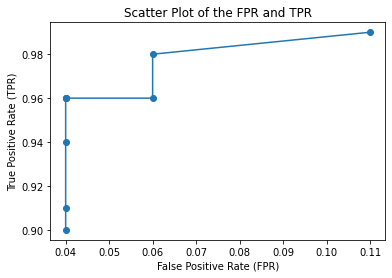

In [35]:
x, y = fpr_list, tpr_list
plt.scatter(x,y)
plt.plot(x,y)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Scatter Plot of the FPR and TPR')
plt.show()

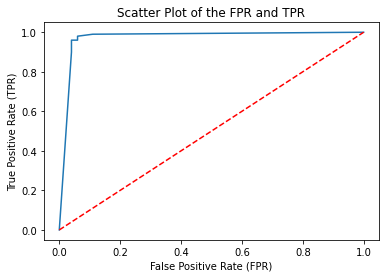

In [36]:
x = [1, 0.11, 0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0]
y = [1, 0.99, 0.98, 0.96, 0.96, 0.96, 0.96, 0.94, 0.91, 0.9, 0]
#x, y = fpr_list, tpr_list
plt.plot(x,y)
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Scatter Plot of the FPR and TPR')
plt.show()

 **(d)** Use the `roc_curve()` function to plot the ROC 
curve and compute the Area Under the Curve (AUC). 

In [37]:
from sklearn.metrics import roc_curve, auc

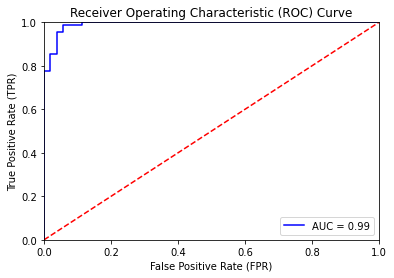

In [38]:
#preds = model.predict(data_test) # debe ser probabilidad
preds = model.probability_list
#probability_list

fpr, tpr, threshold = roc_curve(target_test, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc.round(2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

In [39]:
# THE END :(